#Predicción de popularidad para canciones de Spotify

## 1. Presentación

El desarrollo de este kernel es realizado por el grupo confirmado por: Nicolas Rodríguez, Ezequiel Romero de Haz y Alan Peralta.

##2. Objetivo

El presente Kernel tiene como objetivo analizar y crear un modelo que prediga de manera confiable si una canción llega a ser popular usando los parámetros auditivos de las canciones almacenadas en la plataforma Spotify.

##3. Base de datos
La base de datos se adquirió a través de [Kaggle](https://www.kaggle.com/lehaknarnauli/spotify-datasets?select=tracks.csv) la cual contiene parametros de audio para mas de medio millón de canciones y fue obtenida con la API de spotify.

## Importar Paquetes necesarios.

In [ ]:
import numpy as np 
import pandas as pd # Trabajo con bases de datos
import seaborn as sns # Visualización de datos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh') 
import matplotlib.style as style #Graficos

## Lectura y vista de la base de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lectura de archivo .csv

raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/tracks.csv")

#Visualizar primeras 5 filas de datos
raw_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
#Visualizar tamaño de la base de datos
print("El tamaño de la base de datos es de:", raw_df.shape)

El tamaño de la base de datos es de: (586672, 20)


In [ ]:
#Información general sobre la base de datos: Columnas, datos nulos y tipo de datos
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

La base no requiere una limpieza de datos nulos ya que la descripción nos confirma la ausencia de estos.

In [ ]:
# Descripción de la estadistica descriptiva de los datos. Información trnaspuesta para facil lectura
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [ ]:
#Nombrar atributos
print(raw_df.keys())

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


El siguente [link](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) conduce a la web de desarrollo de spotify donde se explica a detalle como se obtiene la informacion y la intepretación de cada columna de datos.

## Data wrangling

El data set original contiene no solo canciones sino audio libros, podcasts y elementos similares. Estos elementos son fácilmente identificables ya que el valor de la columna "speechiness" es cercano a 1, por lo tanto, se requiere ejecutar un drop para eliminar todas las filas para las cuales el valor de "speechiness" sea mayor a 0.8. 

Ese último valor se escogió dada la distribución de los datos mostrada en la tabla de estadística descriptiva.


In [ ]:
raw_df.drop(raw_df[raw_df['speechiness'] > 0.8].index, inplace = True)

##Análisis exploratorio de datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

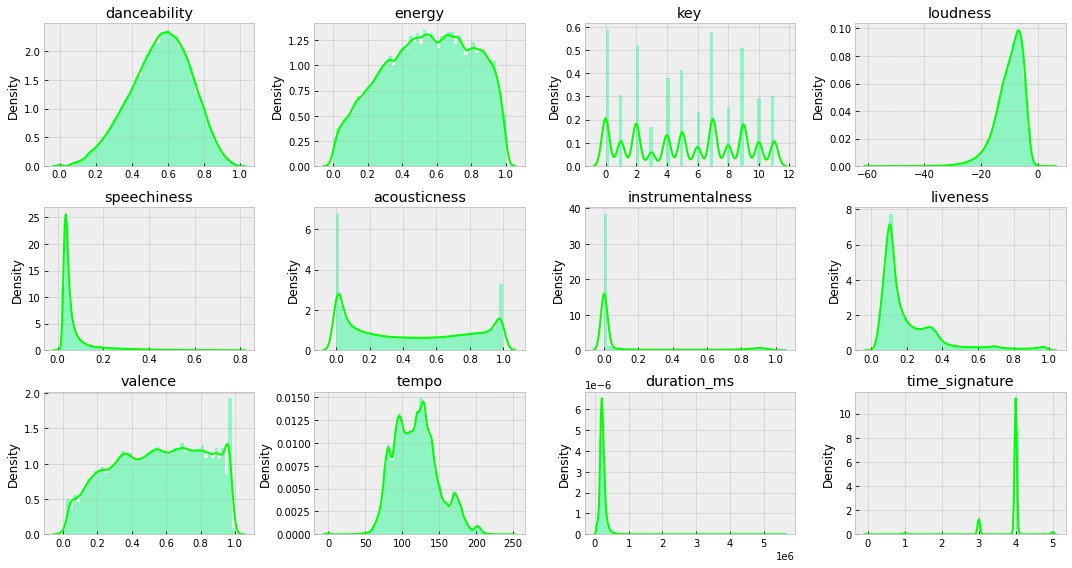

In [ ]:
#Visaulizar distribuicion de variables
variables = ['danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8), facecolor='w')

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(raw_df[variable], ax=axes[i][j], color='lime', hist_kws={"color":'springgreen'})
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()

El grafico anterior nos permite ver la distribución para los parametros de audio de nustra base de datos. 

1. Se puede apreciar que parametros como "danceability", "energy", "loudness", "livness", "valence", "tempo" y "duration_ms" tienden a una distribución normal, en algunos casos con asimetría positiva o negativa.
2. El resto de variable no tienen distribución normal. 

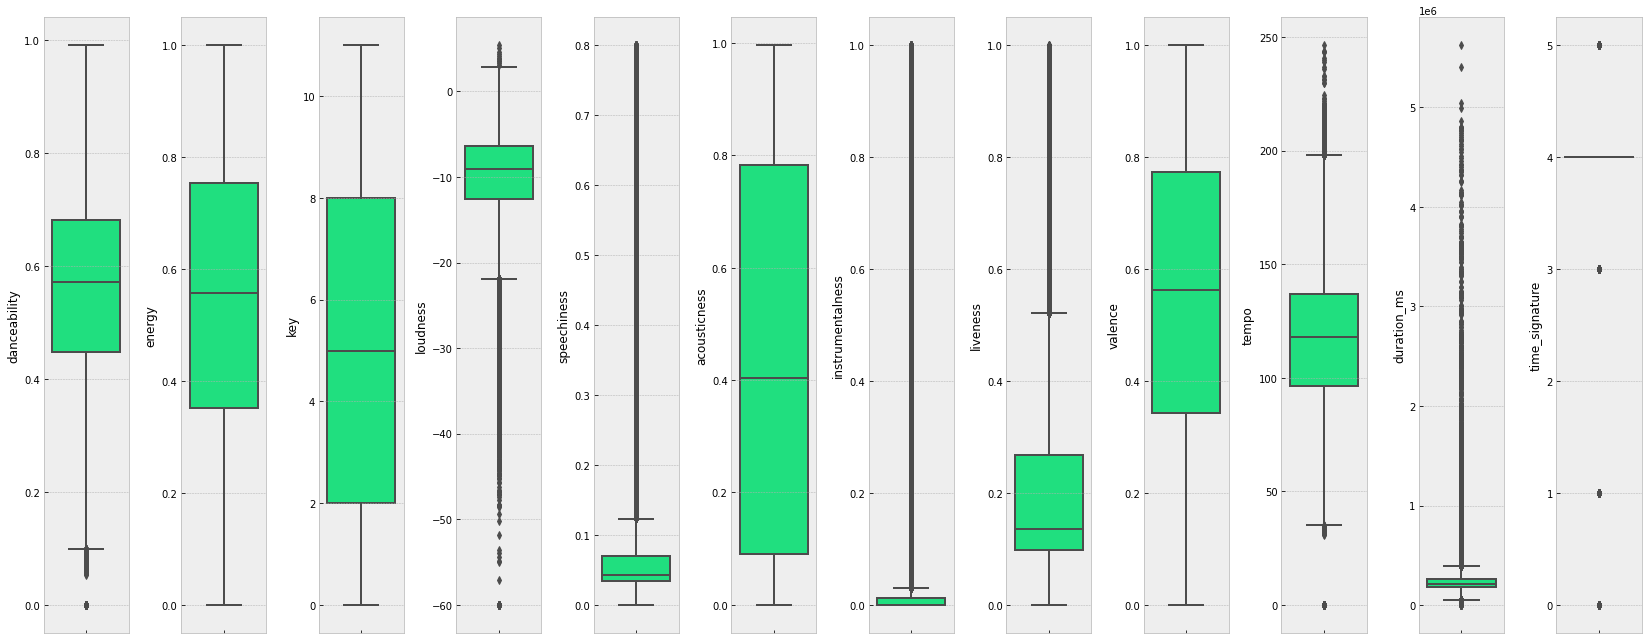

In [ ]:
#Visualizar boxplot para ver valores extremos de los datos
fig, axes = plt.subplots(1, len(variables), figsize=(23,9))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=raw_df, ax=ax, color='springgreen')
plt.tight_layout()

In [ ]:
#generar matriz de correlación entre variables
correlation = raw_df.corr(method="pearson")
correlation.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.033793,0.212428,0.201558,0.293439,0.014967,0.314008,-0.033552,0.045146,-0.369895,-0.246634,-0.046703,0.003108,0.067445,0.085004
duration_ms,0.033793,1.000000,-0.021819,-0.111424,0.021326,0.003190,-0.017187,-0.032626,-0.071734,-0.063961,0.064960,0.027789,-0.167892,-0.014115,0.024882
explicit,0.212428,-0.021819,1.000000,0.157053,0.120969,0.010630,0.132275,-0.052627,0.272977,-0.148111,-0.070778,-0.008264,-0.016315,0.001846,0.043735
danceability,0.201558,-0.111424,0.157053,1.000000,0.266013,0.020613,0.293336,-0.046058,0.187709,-0.260756,-0.218944,-0.131139,0.535334,-0.025446,0.180808
energy,0.293439,0.021326,0.120969,0.266013,1.000000,0.036322,0.763530,-0.066413,0.094348,-0.724611,-0.209008,0.138841,0.381696,0.228718,0.194346


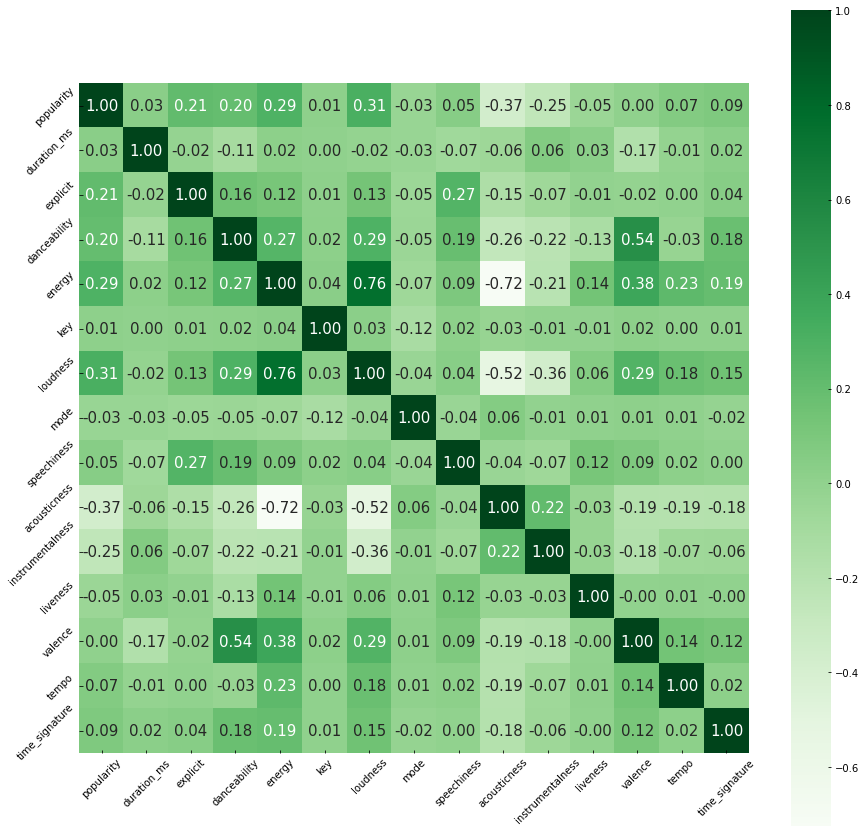

In [ ]:
#Graficar la matriz de correlación para facilitar su lectura.

plt.figure(figsize=(15,15)) #Tamaño del grafico

#Mapa de calor 
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'Greens') 
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

La anterior matriz de correlación nos muestra como algunos parametros tienen una correlación mayor entre sí que otros.

1. loudness vs energy
2. valence vs danceability
3. valence vs energy

### Popularidad basada en diferentes parametros

Text(0.5, 1.0, 'Popularity Based on Time Signature')

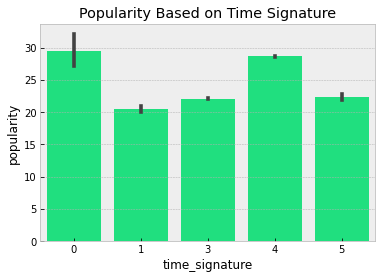

In [ ]:
#popularidad y compás
sns.barplot(x = 'time_signature', y = 'popularity', data = raw_df, color='springgreen')
plt.title('Popularity Based on Time Signature')

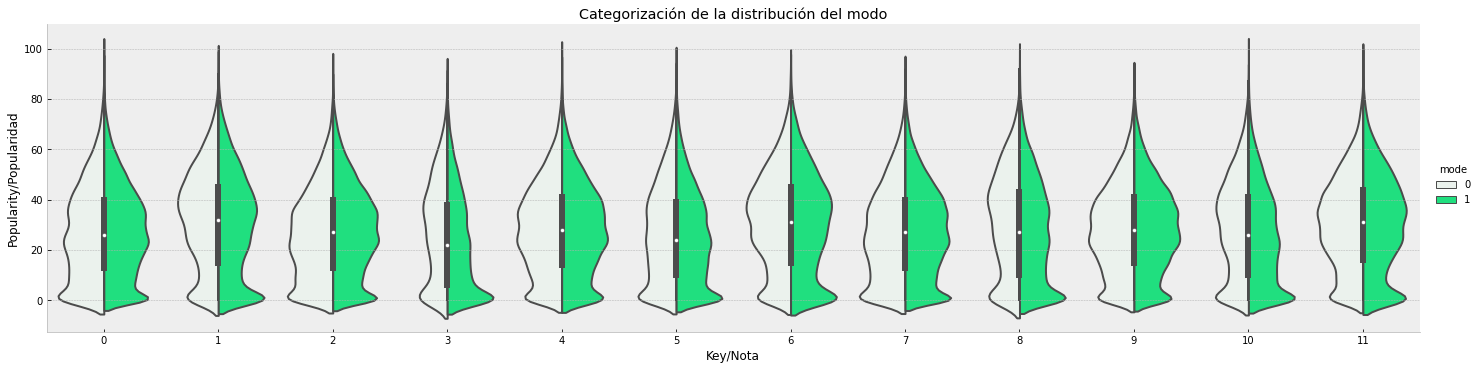

In [ ]:
#función de plot para grafico de violín; popularidad discriminada por modo y nota 
ax = sns.catplot(data=raw_df, kind='violin', x='key', y='popularity', hue='mode', height=5, aspect=4, split=True, color='springgreen')
#funciones de titulos/etiquetas
ax.set(xlabel='Key/Nota', ylabel='Popularity/Popularidad', title='Categorización de la distribución del modo')

### Analisis univariable de la variable "popularity"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


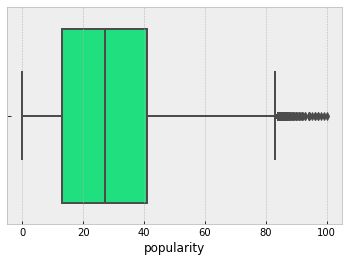

In [ ]:
# grafico de caja para los datos de popularidad de las canciones
from seaborn import boxplot
boxplot(raw_df.popularity, orient="h", color='springgreen')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


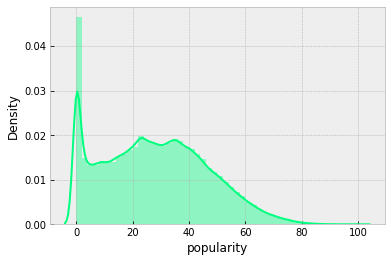

In [ ]:
# grafico de distribución para los datos de popularidad de las canciones
from seaborn import distplot
distplot(raw_df.popularity, color='springgreen')

Análisis Bivariado

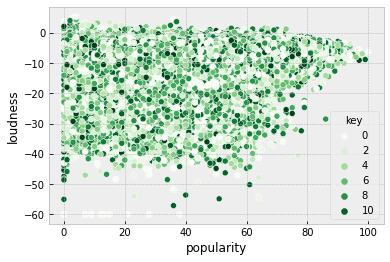

In [ ]:
sns.scatterplot(data = raw_df, x = raw_df['popularity'], y = 'loudness', hue='key', palette='Greens')

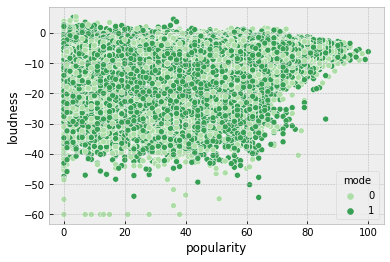

In [ ]:
sns.scatterplot(data = raw_df, x = raw_df['popularity'], y = 'loudness', hue='mode', palette='Greens')

##Feature Engineering

Para el desarrollo de la clasificación, se definirá una canción como "popular" cuando su valor en la columna "popularity" sea mayor o igual a 41, marcandola como 1 en el sistema binario y "no popular" menor a 41 marcandola como 0.

Se usa el valor 41 como referencia ya que el el cuartil mas alto de "popularity" empieza con ese valor.

In [ ]:
raw_df.loc[raw_df['popularity'] < 41, 'popularity'] = 0 #Reempalzar valores menores a 41 con 0
raw_df.loc[raw_df['popularity'] >= 41, 'popularity'] = 1 #Reempalzar valores mayores o iguales a 41 con 1
raw_df.loc[raw_df['popularity'] == 1] #Data Frame cuando "popularity" = 1

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
149,2wAfHM7Whz67VFbdanhZlk,Nobody Knows You When You're Down and Out,1,177133,0,['Bessie Smith'],['5ESobCkc6JI4tIMxQttqeg'],1923,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.1830,0.2110,89.822,4
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',1,237773,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926,0.515,0.2220,0,-16.918,0,0.0575,0.821,0.001930,0.1900,0.3500,98.358,4
1858,0eInL1bLAFdHJDL04R0OCP,Two Sleepy People,1,183560,0,['Fats Waller'],['0DYWCXTkNqGFZIf67SrWEa'],1926,0.651,0.0867,5,-18.882,1,0.0480,0.725,0.000065,0.1690,0.5400,87.221,4
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",1,520133,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1928,0.626,0.7440,2,-9.189,0,0.0662,0.847,0.892000,0.1450,0.2590,113.117,4
3858,2P9nh9pTK96dE0b6NBbTSs,"Dark Was the Night, Cold Was the Ground",1,198560,0,['Blind Willie Johnson'],['5kO4xdEKLuHHHPreu3UmkZ'],1928,0.394,0.0406,9,-23.179,1,0.0440,0.968,0.045300,0.0976,0.2000,116.117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,1,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3
586667,5rgu12WBIHQtvej2MdHSH0,云与海,1,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,1,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,1,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4


## Ajuste del modelo y predicción

 Para la predicción se usarán los siguientes modelos:
 1. Regresión logistica
 2. Random Forest
 3. K Neighbors
 4. Decision tree
 

In [ ]:
#Importar librerias de algoritmos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
#definimos los parametros auditivos de las canciones a partir de teoria musical para omitir la información general del artista/pista/album
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [ ]:
#Ahora se destina el 80% del data frame para entrenamiento y el otro 20% para testeo.
training = raw_df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = raw_df.drop(training.index)[features]

In [ ]:
#Se agrega la validación del data set usando: train_test_split.

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

##Ejecución de de modelos

###Regresión logistica

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.7374447879858658
AUC: 0.5


###Random Forest Classifier

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.766850706713781
AUC: 0.6077833000441021


###K-Nearest Neighbors Classifier

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.6906360424028268
AUC: 0.5217529515382251


###Decision Tree Classifier

In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.6794942579505301
AUC: 0.5922805946211236


##Rendimiento del modelo

In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [ ]:
print(model_performance_accuracy.sort_values(by = "Accuracy", ascending = False))
print()
print(model_performance_AUC.sort_values(by = "AUC", ascending = False))


                    Model  Accuracy
1  RandomForestClassifier  0.766851
0      LogisticRegression  0.737445
2    KNeighborsClassifier  0.690636
3  DecisionTreeClassifier  0.679494

                    Model       AUC
1  RandomForestClassifier  0.607783
3  DecisionTreeClassifier  0.592281
2    KNeighborsClassifier  0.521753
0      LogisticRegression  0.500000


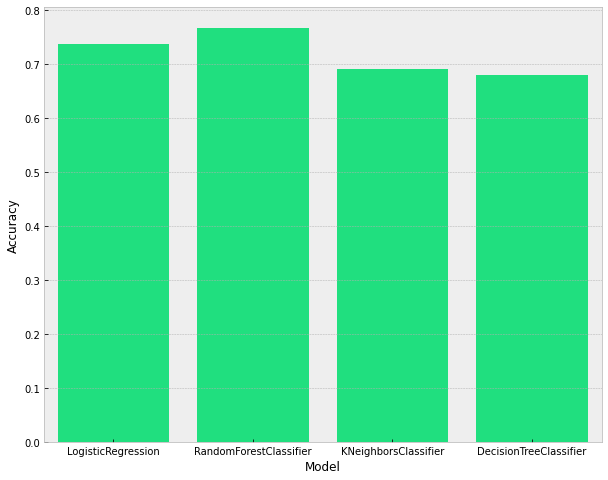

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=model_performance_accuracy, x='Model', y='Accuracy', color='springgreen')